In [1892]:
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt

## Functions

In [1893]:
def percent(val, total):
    return round(100 * val/total, 2)

def annotate(ax, title='', strformat='', divideby=1):
    # Annotate
    for p in ax.patches:
        # format(, '.1f')
        value = p.get_height()/divideby
        ax.annotate(f"{value:.1f}{strformat}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    ax.set_title(title)

## Read dataset

In [1894]:
df = pd.read_csv('data/kaggle_survey_2021_responses.csv', header=[0,1])

/Users/sreedevigattu/sree/projects/mlds/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (195,201) have mixed types.Specify dtype option on import or set low_memory=False.



In [1895]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Columns: 369 entries, ('Time from Start to Finish (seconds)', 'Duration (in seconds)') to ('Q38_B_OTHER', 'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other')
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


In [1896]:
print(df.columns.tolist())

[('Time from Start to Finish (seconds)', 'Duration (in seconds)'), ('Q1', 'What is your age (# years)?'), ('Q2', 'What is your gender? - Selected Choice'), ('Q3', 'In which country do you currently reside?'), ('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'), ('Q5', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'), ('Q6', 'For how many years have you been writing code and/or programming?'), ('Q7_Part_1', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'), ('Q7_Part_2', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R'), ('Q7_Part_3', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL'), ('Q7_Part_4', 'What programming languages do you use on a regular basis? (Select all that apply) - Sele

In [1897]:
df.iloc[0,:].to_frame().to_csv("Columns.csv")

<AxesSubplot:>

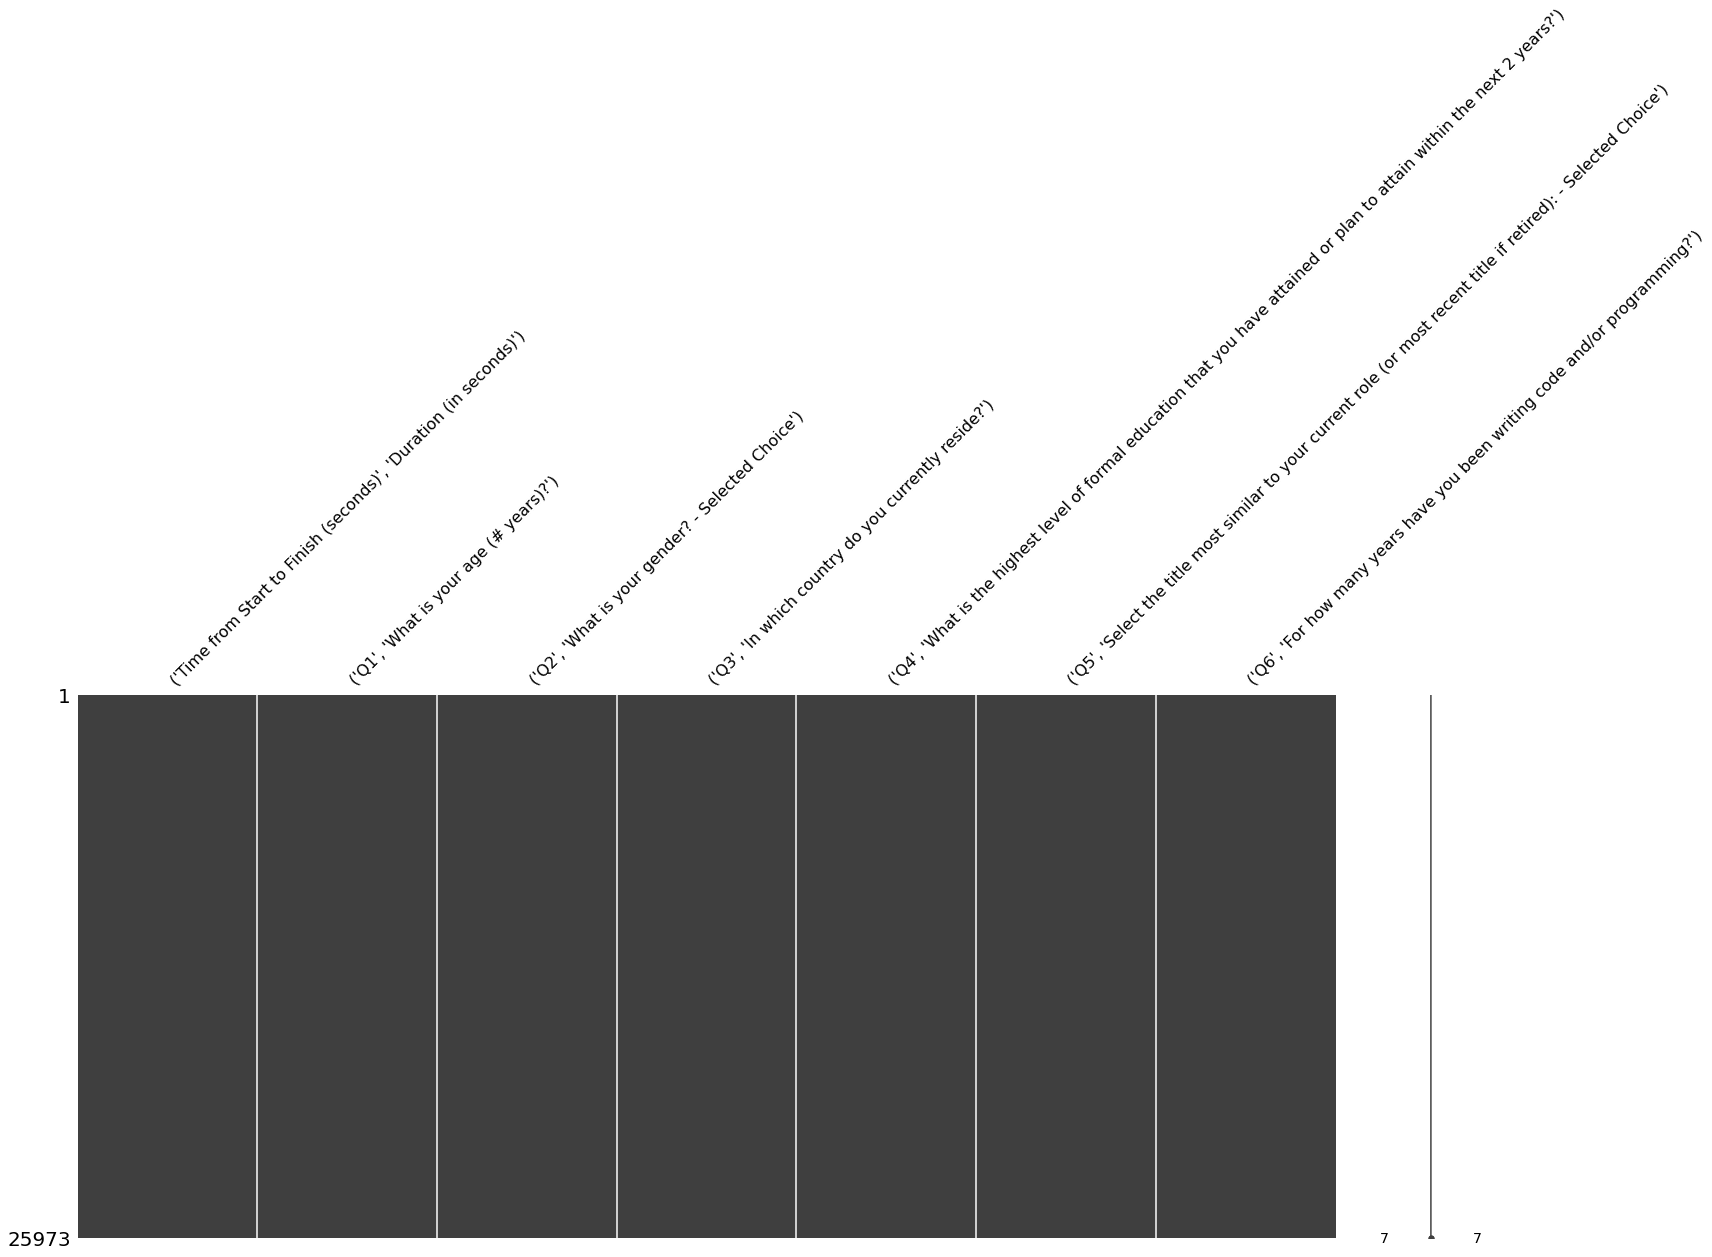

In [1898]:
msno.matrix(df.iloc[:,:7])

## Age and Gender

In [1899]:
df_new = pd.DataFrame()
df_new['Age'] = df['Q1', 'What is your age (# years)?']
df_new['Gender'] = df['Q2', 'What is your gender? - Selected Choice']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     25973 non-null  object
 1   Gender  25973 non-null  object
dtypes: object(2)
memory usage: 406.0+ KB


In [1900]:
df_new.groupby(by='Age').agg({"Age":'count'}).rename(columns={'Age':'Count'}).reset_index(inplace=True)
print(df_new['Gender'].value_counts())
df_new

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: Gender, dtype: int64


,Age,Gender
0,50-54,Man
1,50-54,Man
2,22-24,Man
3,45-49,Man
4,45-49,Man
...,...,...
25968,30-34,Man
25969,22-24,Man
25970,50-54,Man
25971,45-49,Man


In [1901]:
df_new['Gender'] = df_new['Gender'].apply(lambda x: x if x in ['Man', 'Woman'] else 'Other')
df_new["Age-Category"] = df_new['Age'].apply(lambda x: '<40' if x in ['18-21', '22-24', '25-29', '30-34', '35-39'] else '>40')
df_new.head()

,Age,Gender,Age-Category
0,50-54,Man,>40
1,50-54,Man,>40
2,22-24,Man,<40
3,45-49,Man,>40
4,45-49,Man,>40


In [1902]:
df_new.groupby(by=['Age-Category','Gender']).agg({'Age-Category':'count'})

Age-Category
Age-Category Gender              
<40          Man            15956
             Other            368
             Woman           4147
>40          Man             4642
             Other            117
             Woman            743

In [1903]:
pd.pivot_table(df_new, index='Gender', columns = 'Age', values ='Age', aggfunc='count')

Age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Gender,,,,,,,,,,,
Man,3696,3643,3859,2765,1993,1537,1171,811,509,504,110
Other,88,88,78,58,56,36,29,17,11,14,10
Woman,1117,963,994,618,455,317,175,136,72,35,8


In [1904]:
df_ = df_new.groupby(by=['Age','Gender']).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
df_.reset_index(inplace=True)
df_

,Age,Gender,Count
0,18-21,Man,3696
1,18-21,Other,88
2,18-21,Woman,1117
3,22-24,Man,3643
4,22-24,Other,88
5,22-24,Woman,963
6,25-29,Man,3859
7,25-29,Other,78
8,25-29,Woman,994
9,30-34,Man,2765


In [1905]:
import numpy as np

In [1906]:
df_summary = pd.pivot_table(data = df_,  values='Count', index=['Age'], columns=['Gender'], aggfunc=np.sum, fill_value=0)
df_summary

Gender,Man,Other,Woman
Age,,,
18-21,3696,88,1117
22-24,3643,88,963
25-29,3859,78,994
30-34,2765,58,618
35-39,1993,56,455
40-44,1537,36,317
45-49,1171,29,175
50-54,811,17,136
55-59,509,11,72


In [1907]:
#df_summary['Other'] = df_summary['Prefer not to say'] + df_summary['Nonbinary'] + df_summary['Prefer to self-describe']
df_summary['Count'] = df_summary['Man'] + df_summary['Woman'] + df_summary['Other']
#df_summary.drop(columns=['Prefer not to say','Nonbinary', 'Prefer to self-describe'],inplace=True)
df_summary.columns = ['Gender-Man','Gender-Woman', 'Gender-Other','Count']
df_summary.reset_index(inplace=True)
df_summary = df_summary[['Age', 'Count', 'Gender-Man', 'Gender-Woman', 'Gender-Other']]
df_summary

,Age,Count,Gender-Man,Gender-Woman,Gender-Other
0,18-21,4901,3696,88,1117
1,22-24,4694,3643,88,963
2,25-29,4931,3859,78,994
3,30-34,3441,2765,58,618
4,35-39,2504,1993,56,455
5,40-44,1890,1537,36,317
6,45-49,1375,1171,29,175
7,50-54,964,811,17,136
8,55-59,592,509,11,72
9,60-69,553,504,14,35


In [1908]:
df_summary['Age'].values

array(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-69', '70+'], dtype=object)

In [1909]:
df_summary["Age-Category"] = df_summary['Age'].apply(lambda x: '<40' if x in ['18-21', '22-24', '25-29', '30-34', '35-39'] else '>40')

/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_84971/3757996097.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1910]:
import plotly.graph_objects as go
NODES = dict( #           0                               1                          2        3       4           5
            label = ["18-21", "22-24", "25-29", "Gender-Man", "Gender-Woman", "Gender-Other"],
            color = ["seagreen", "dodgerblue", "orange", "gold", "silver", "brown" ],)

LINKS = dict(   source = [  0,  0,  0,  1,  1,  1,  2,  2,  2], # The origin or the source nodes of the link
                target = [  3,  4,  5,  3,  4,  5,  3,  4,  5], # The destination or the target nodes of the link
                value =  [ 3696, 1117, 88, 3643, 963, 88, 3859, 994, 78], # The width (quantity) of the links 
                # Color of the links 
                # Target Node:    3-Gold          4 -Silver        5-Bronze           
                color =     [   "lightgreen",   "lightgreen",   "lightgreen",      # Source Node: 0 - United States of America
                                "lightskyblue", "lightskyblue", "lightskyblue",    # Source Node: 1 - People's Republic of China
                                "bisque",       "bisque",       "bisque"],)        # Source Node: 2 - Japan

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.update_layout(title="Age - Gender",  font_size=16)
fig.show()

In [1911]:
import plotly.express as px
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [1912]:
df_summary.head()

,Age,Count,Gender-Man,Gender-Woman,Gender-Other,Age-Category
0,18-21,4901,3696,88,1117,<40
1,22-24,4694,3643,88,963,<40
2,25-29,4931,3859,78,994,<40
3,30-34,3441,2765,58,618,<40
4,35-39,2504,1993,56,455,<40


In [1913]:
df_age = df_summary.groupby(by='Age-Category').agg({'Count':np.sum, 'Gender-Man': np.sum, 'Gender-Woman':np.sum})
df_age.reset_index(inplace=True)
df_age

,Age-Category,Count,Gender-Man,Gender-Woman
0,<40,20471,15956,368
1,>40,5502,4642,117


In [1914]:
import plotly.express as px
fig = px.treemap(
    names = ["Total","<40", "Men", "Women",">40", "Men->40", "Women->40"],
    parents = ["", "Total", "<40", "<40", "Total", ">40", ">40"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [1915]:
import plotly.express as px
df_ex = px.data.tips()
fig = px.treemap(df_ex, path=[px.Constant("all"), 'day', 'time', 'sex'], values='total_bill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [1916]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1917]:
df_["Age-Category"] = df_['Age'].apply(lambda x: '<40' if x in ['18-21', '22-24', '25-29', '30-34', '35-39'] else '>40')
df_['Gender'] = df_['Gender'].apply(lambda x: x if x in ['Man', 'Woman'] else 'Other')
df_.head()

,Age,Gender,Count,Age-Category
0,18-21,Man,3696,<40
1,18-21,Other,88,<40
2,18-21,Woman,1117,<40
3,22-24,Man,3643,<40
4,22-24,Other,88,<40


In [1918]:
fig = px.treemap(df_, path=[px.Constant("all"), 'Age', 'Gender'], values='Count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [1919]:
fig = px.treemap(df_, path=[px.Constant("all"), 'Age-Category', 'Gender'], values='Count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## TODO: Change the labels (percentages?) and colors

## Programming Languages

In [1920]:
COLS_PROGLANG = list(filter(lambda x: True if x[0][:2]=='Q7' and x[0][-2:] != '12' else False, df.columns.to_list())) # TODO: 'None' should not be considered here
COLS_PROGLANG_OTHER = list(filter(lambda x: True if x[0][:2]=='Q7' and x[0][-2:] not in ['_1','_2','_3','12'] else False, df.columns.to_list()))
print("COLS_PROGLANG", end=': ');[print(col[0], end=', ') for col in COLS_PROGLANG]; print()
print("COLS_PROGLANG_OTHER", end=': ');[print(col[0], end=', ') for col in COLS_PROGLANG_OTHER]; print()
df[COLS_PROGLANG].head()

COLS_PROGLANG: Q7_Part_1, Q7_Part_2, Q7_Part_3, Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_OTHER, 
COLS_PROGLANG_OTHER: Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_OTHER, 


,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_OTHER
,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN
2,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN


In [1921]:
df[COLS_PROGLANG].count().sort_values(ascending=False)

Q7_Part_1   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python        21860
Q7_Part_3   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL           10756
Q7_Part_5   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++            5535
Q7_Part_2   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R              5334
Q7_Part_6   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java           4769
Q7_Part_4   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C              4709
Q7_Part_7   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript     4332
Q7_Part_11  What programming languages do you use on a regular

In [1922]:
df_new.head()

,Age,Gender,Age-Category
0,50-54,Man,>40
1,50-54,Man,>40
2,22-24,Man,<40
3,45-49,Man,>40
4,45-49,Man,>40


In [1923]:
df_new['Python'] = df['Q7_Part_1']; df_new['Python'] = df_new['Python'].apply(lambda x: 1 if x=="Python" else 0)
df_new['R'] = df['Q7_Part_2'];      df_new['R'] = df_new['R'].apply(lambda x: 1 if x=="R" else 0)
df_new['SQL'] = df['Q7_Part_3'];    df_new['SQL'] = df_new['SQL'].apply(lambda x: 1 if x=="SQL" else 0)
df_new['None'] = df['Q7_Part_12'];  df_new['None'] = df_new['None'].apply(lambda x: 1 if x=="None" else 0)
df_new['Other'] = df[COLS_PROGLANG_OTHER].count(axis=1) # df_new['Other'] = df['Q7_Part_4'] + df['Q7_Part_5'] + df['Q7_Part_6'] + df['Q7_Part_7'] + df['Q7_Part_8'] + df['Q7_Part_9'] + df['Q7_Part_10'] + df['Q7_Part_11'] + df['Q7_OTHER']
df_new['ProgLang'] = df['Q8']
df_new['ProgLangCount'] = df[COLS_PROGLANG].count(axis=1) # None is not considered
df_new.head()

,Age,Gender,Age-Category,Python,R,SQL,None,Other,ProgLang,ProgLangCount
0,50-54,Man,>40,1,1,0,0,0,Python,2
1,50-54,Man,>40,0,0,1,0,3,Python,4
2,22-24,Man,<40,1,0,0,0,2,Python,3
3,45-49,Man,>40,1,0,0,0,0,Python,1
4,45-49,Man,>40,1,0,0,0,2,Python,3


In [1924]:
print(df_new['Python'].sum(), df_new[df_new['Python']==0]['Python'].count(), df_new.shape[0])

21860 4113 25973


In [1925]:
def abc(label, lt40, gt40):
    print(f"{label:5}    <40: {percent(lt40,df.shape[0]):2.2f}%    >40: {percent(gt40,df.shape[0]):2.2f}%")

abc("Woman", 4147, 743)
abc("Man", 15956, 4642)

Woman    <40: 15.97%    >40: 2.86%
Man      <40: 61.43%    >40: 17.87%


In [1926]:
df_temp = df_new.agg({'Python':np.sum,'R':np.sum,'SQL':np.sum, 'Other':np.sum, 'None':np.sum}).to_frame()
df_temp.rename(columns={0:"Overall"}, inplace=True)
df_temp

,Overall
Python,21860
R,5334
SQL,10756
Other,27618
None,319


In [1927]:
df_pl_all = pd.DataFrame()
df_pl_all.loc['Count','Overall']=df.shape[0]
df_pl_all = pd.concat([df_pl_all, df_temp])
df_pl_all.loc['Other','Overall']=df_pl_all.loc['Other','Overall']/len(COLS_PROGLANG_OTHER)
df_pl_all['Overall'] = df_pl_all['Overall'].apply(lambda x: round((x/df.shape[0])*100,2))
df_pl_all

,Overall
Count,100.00
Python,84.16
R,20.54
SQL,41.41
Other,11.81
None,1.23


In [1928]:
def convert2percent(df, col, total_col):
    df[col] = df[col]/ df[total_col]
    return df[col].apply(lambda x: round(x*100,2))


In [1929]:
df_pl_summary = df_new.groupby(by=['Age-Category','Gender']).agg({'Age-Category':'count','Python':np.sum,'R':np.sum,'SQL':np.sum, 'Other':np.sum, 'None':np.sum})
df_pl_summary.rename(columns={"Age-Category":"Count"}, inplace=True)

df_pl_summary["Python"] = convert2percent(df_pl_summary,"Python","Count")
df_pl_summary["R"] = convert2percent(df_pl_summary,"R","Count")
df_pl_summary["SQL"] = convert2percent(df_pl_summary,"SQL","Count")

df_pl_summary["Other"] = df_pl_summary["Other"]/ df_pl_summary["Count"]
df_pl_summary["Other"] = df_pl_summary["Other"].apply(lambda x: round(x*100/len(COLS_PROGLANG_OTHER),2))

df_pl_summary["None"] = convert2percent(df_pl_summary,"None","Count")

df_pl_summary['Count'] = df_pl_summary['Count'].apply(lambda x: round((x/df.shape[0])*100,2))

df_pl_summary

Count  Python      R    SQL  Other  None
Age-Category Gender                                          
<40          Man     61.43   87.68  18.06  39.99  11.73  0.73
             Other    1.42   85.87  22.01  41.03  13.07  1.90
             Woman   15.97   81.60  22.45  42.78  11.18  1.52
>40          Man     17.87   77.38  25.64  44.55  12.79  2.07
             Other    0.45   72.65  30.77  47.01  17.00  3.42
             Woman    2.86   66.35  28.80  44.01   9.72  4.44

In [1930]:
df_pl_woman_lt40 = df_pl_summary.loc[('<40', 'Woman'),:].to_frame()
df_pl_woman_gt40 = df_pl_summary.loc[('>40', 'Woman'),:].to_frame()
df_pl_woman_lt40

,<40
,Woman
Count,15.97
Python,81.60
R,22.45
SQL,42.78
Other,11.18
None,1.52


        Overall  (<40, Woman)  (>40, Woman)
Count    100.00         15.97          2.86
Python    84.16         81.60         66.35
R         20.54         22.45         28.80
SQL       41.41         42.78         44.01
Other     11.81         11.18          9.72
None       1.23          1.52          4.44


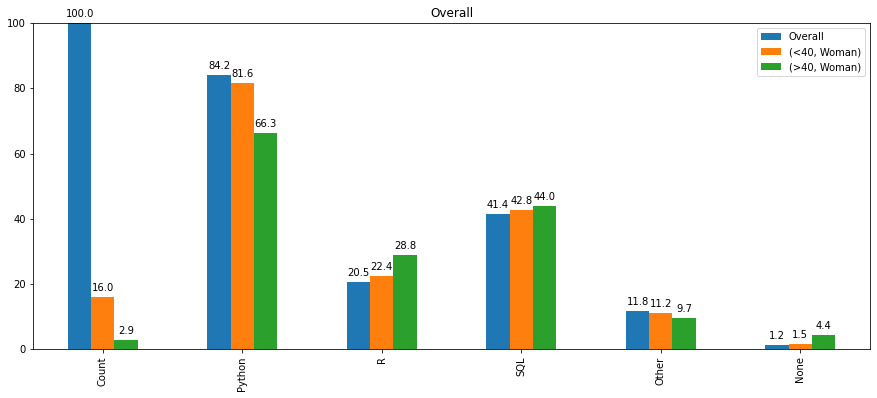

In [1931]:
df_temp = pd.concat([df_pl_all, df_pl_woman_lt40, df_pl_woman_gt40], axis=1, join='inner')
print(df_temp)
ax = df_temp.plot.bar( ylim=(0,100),figsize=(15, 6));annotate(ax, "Overall")

- A mere 3% of the total community is >40 women.
- 66-44 use Python-SQL
- 4.4 use None

  Age-Category  ProgLangCount ProgLang
0          >40              2   Python
1          >40              4   Python
2          <40              3   Python
3          >40              1   Python
4          >40              3   Python
   Age-Category  ProgLangCount ProgLang
5           <40              1   Python
6           <40              3   Python
11          <40              3        R
12          <40              2   Python
21          <40              4        R


<AxesSubplot:title={'center':'ProgLangCount'}, xlabel='[Age-Category]'>

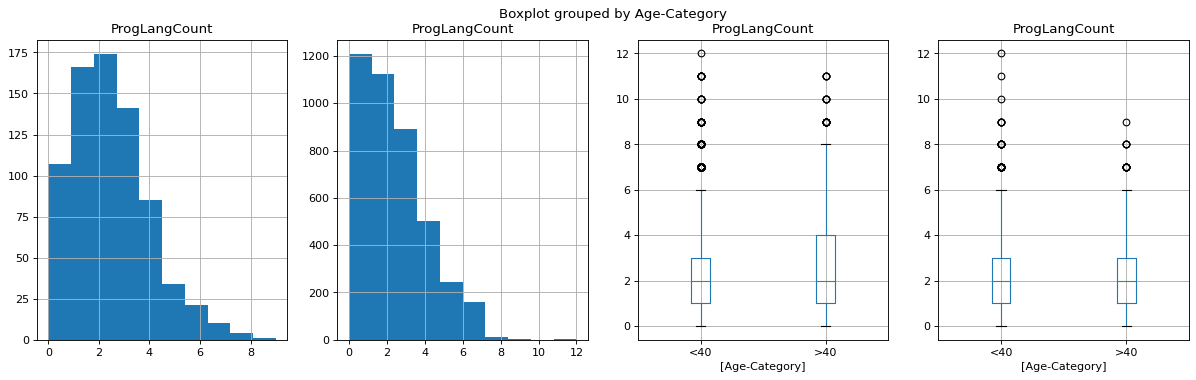

In [1932]:
df_man = df_new[df_new['Gender']=='Man'][['Age-Category', 'ProgLangCount','ProgLang']];print(df_man.head())
df_woman = df_new[df_new['Gender']=='Woman'][['Age-Category', 'ProgLangCount','ProgLang']];print(df_woman.head())
plt.figure(figsize=(18, 5), dpi=80)

ax = plt.subplot(1, 4, 1); df_woman[df_woman['Age-Category']=='>40'].hist(ax=ax)
ax = plt.subplot(1, 4, 2); df_woman[df_woman['Age-Category']=='<40'].hist(ax=ax)
ax = plt.subplot(1, 4, 3); df_man.boxplot(by='Age-Category', ax=ax)
ax = plt.subplot(1, 4, 4); df_woman.boxplot(by='Age-Category',ax=ax)

In [1933]:
def my_value_counts(df, col):
    df_ = df['ProgLang'].value_counts(normalize=True).to_frame()
    #print(df_pl_all)
    return df_


In [1934]:
df_pl_all = my_value_counts(df_new, 'ProgLang') 
df_pl_man = my_value_counts(df_man, 'ProgLang') 
df_pl_woman =  my_value_counts(df_woman, 'df_woman')
df_pl_woman_lt40 =  my_value_counts(df_woman[df_woman['Age-Category']=='<40'], 'ProgLang') 
df_pl_woman_gt40 =  my_value_counts(df_woman[df_woman['Age-Category']=='>40'], 'ProgLang') 

In [1935]:
df_res = pd.merge(df_pl_man, df_pl_woman, left_index=True, right_index=True,suffixes=['_m','_w'])
df_res = pd.merge(df_res, df_pl_woman_lt40, left_index=True, right_index=True)
df_res = pd.merge(df_res, df_pl_woman_gt40, left_index=True, right_index=True,suffixes=['_w_lt40','_w_gt40'])
df_res = pd.merge(df_pl_all, df_res, left_index=True, right_index=True)
round(df_res*100,1)

,ProgLang,ProgLang_m,ProgLang_w,ProgLang_w_lt40,ProgLang_w_gt40
Python,81.0,82.0,77.5,78.5,71.4
R,5.8,5.6,6.8,6.3,10.0
SQL,5.4,5.0,7.0,6.6,9.1
C,1.8,1.7,2.1,2.3,1.2
C++,1.8,1.7,1.8,1.9,1.5
Java,1.0,0.9,1.3,1.3,1.3
MATLAB,0.9,0.8,1.1,1.1,1.0
Other,0.7,0.7,0.8,0.6,2.1
Javascript,0.5,0.5,0.6,0.6,1.0
None,0.4,0.4,0.5,0.5,0.9


<AxesSubplot:>

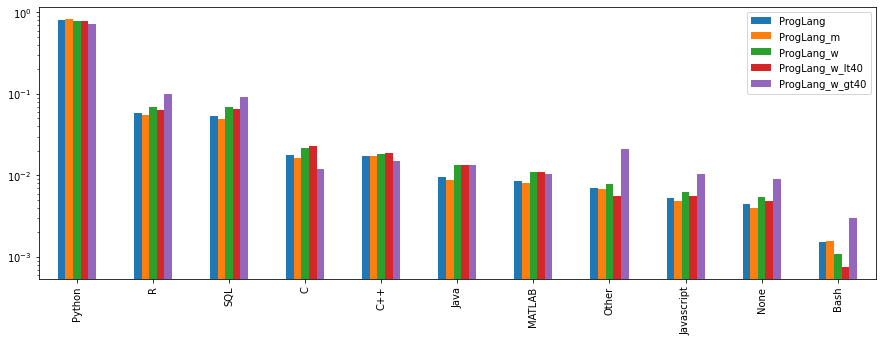

In [1936]:
df_res.plot.bar(figsize=(15,5), logy=True)

## IDE

In [1937]:
# Get the list of IDE columns (apart from None)
COLS_IDE = list(filter(lambda x: True if x[0][:2]=='Q9' and x[0][-2:] != '12' else False, df.columns.to_list()))
COL_DE_NONE = ['Q9_Part_12']

In [1938]:
# Sort the IDEs based on the count
df[COLS_IDE].count().sort_values(ascending=False)

Q9_Part_11  Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook                                16233
Q9_Part_4   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode)                     10040
Q9_Part_5   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm                                          7468
Q9_Part_1   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)      5488
Q9_Part_2   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStu

In [1939]:
# Categorise the list of columns that are top3 and not top3
COLS_IDE_TOP3 = ['Q9_Part_11','Q9_Part_4','Q9_Part_5']
COLS_IDE_OTHER = list(filter(lambda x: True if x[0][:2]=='Q9' and x[0] not in COLS_IDE_TOP3 + COL_DE_NONE else False, df.columns.to_list())) #[-2:]

print("COLS_IDE", end=': ');[print(col[0], end=', ') for col in COLS_IDE]; print()
print("COLS_IDE_TOP3", end=': ');[print(col, end=', ') for col in COLS_IDE_TOP3]; print()
print("COLS_IDE_OTHER", end=': ');[print(col[0], end=', ') for col in COLS_IDE_OTHER]; print()
print("COLS_IDE_NONE", end=': ');[print(col, end=', ') for col in COL_DE_NONE]; print()

df[COLS_IDE].head()

COLS_IDE: Q9_Part_1, Q9_Part_2, Q9_Part_3, Q9_Part_4, Q9_Part_5, Q9_Part_6, Q9_Part_7, Q9_Part_8, Q9_Part_9, Q9_Part_10, Q9_Part_11, Q9_OTHER, 
COLS_IDE_TOP3: Q9_Part_11, Q9_Part_4, Q9_Part_5, 
COLS_IDE_OTHER: Q9_Part_1, Q9_Part_2, Q9_Part_3, Q9_Part_6, Q9_Part_7, Q9_Part_8, Q9_Part_9, Q9_Part_10, Q9_OTHER, 
COLS_IDE_NONE: Q9_Part_12, 


,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER
,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio Code (VSCode),Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter Notebook,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN
2,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,Other
3,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN
4,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN


In [1940]:
# Create a new column IDE Count to store the number of IDEs used
df_new['IDECount'] = df[COLS_IDE].count(axis=1)
df_new.head()

,Age,Gender,Age-Category,Python,R,SQL,None,Other,ProgLang,ProgLangCount,IDECount
0,50-54,Man,>40,1,1,0,0,0,Python,2,1
1,50-54,Man,>40,0,0,1,0,3,Python,4,2
2,22-24,Man,<40,1,0,0,0,2,Python,3,3
3,45-49,Man,>40,1,0,0,0,0,Python,1,2
4,45-49,Man,>40,1,0,0,0,2,Python,3,3


In [1943]:
def createNewCol(df_old, oldCol, df_new, newCol, value):
    df_new[newCol] = df_old[oldCol]
    # strip the value of the leading and trailing empty spaces
    df_new.loc[~df_new[newCol].isnull(), newCol] = df_new[~df_new[newCol].isnull()][newCol].apply(lambda x: x.strip())
    return  df_new[newCol].apply(lambda x: 1 if x== value else 0)
    


In [1946]:
# Create new columns to store the top3, other and none IDEs
df_new['JupyterNotebook'] = createNewCol(df, 'Q9_Part_11', df_new, 'JupyterNotebook', "Jupyter Notebook")
df_new['VSCode'] = createNewCol(df, 'Q9_Part_4', df_new, 'VSCode', "Visual Studio Code (VSCode)")
df_new['PyCharm'] = createNewCol(df, 'Q9_Part_5', df_new, 'PyCharm', "PyCharm")
df_new['IDE-None'] = createNewCol(df, 'Q9_Part_12', df_new, 'IDE-None', "None")
df_new['IDE-Other'] = df[COLS_IDE_OTHER].count(axis=1) 
df_new['IDECount'] = df[COLS_IDE].count(axis=1) # None is not considered
df_new.head()

,Age,Gender,Age-Category,Python,R,SQL,None,Other,ProgLang,ProgLangCount,IDECount,JupyterNotebook,VSCode,PyCharm,IDE-None,IDE-Other
0,50-54,Man,>40,1,1,0,0,0,Python,2,1,0,0,0,0,1
1,50-54,Man,>40,0,0,1,0,3,Python,4,2,1,0,0,0,1
2,22-24,Man,<40,1,0,0,0,2,Python,3,3,1,0,1,0,1
3,45-49,Man,>40,1,0,0,0,0,Python,1,2,1,0,0,0,1
4,45-49,Man,>40,1,0,0,0,2,Python,3,3,1,0,0,0,2


In [1948]:
# Create a df with the IDE and total number of IDE users
df_temp = df_new.agg({'JupyterNotebook':np.sum,'VSCode':np.sum,'PyCharm':np.sum, 'IDE-Other':np.sum, 'IDE-None':np.sum}).to_frame()
df_temp.rename(columns={0:"Overall"}, inplace=True)
df_temp

,Overall
JupyterNotebook,16233
VSCode,10040
PyCharm,7468
IDE-Other,30279
IDE-None,526


In [1949]:
# Create a df with the overall IDE users as percentage
df_pl_all = pd.DataFrame()
df_pl_all.loc['Count','Overall']=df.shape[0]
df_pl_all = pd.concat([df_pl_all, df_temp])
df_pl_all.loc['IDE-Other','Overall']=df_pl_all.loc['IDE-Other','Overall']/len(COLS_IDE_OTHER)
df_pl_all['Overall'] = df_pl_all['Overall'].apply(lambda x: round((x/df.shape[0])*100,2))
df_pl_all

,Overall
Count,100.00
JupyterNotebook,62.50
VSCode,38.66
PyCharm,28.75
IDE-Other,12.95
IDE-None,2.03


In [1957]:
# Create a df with IDE users wrt Age-group and Gender 
# TODO: This is not used. Do we need this?
df_pl_summary = df_new.groupby(by=['Age-Category','Gender']).agg({'Age-Category':'count','JupyterNotebook':np.sum,'VSCode':np.sum,'PyCharm':np.sum, 'IDE-Other':np.sum, 'IDE-None':np.sum})
df_pl_summary.rename(columns={"Age-Category":"Count"}, inplace=True)

df_pl_summary["JupyterNotebook"] = convert2percent(df_pl_summary,"JupyterNotebook","Count")
df_pl_summary["VSCode"] = convert2percent(df_pl_summary,"VSCode","Count")
df_pl_summary["PyCharm"] = convert2percent(df_pl_summary,"PyCharm","Count")

df_pl_summary["IDE-Other"] = df_pl_summary["IDE-Other"]/ df_pl_summary["Count"]
df_pl_summary["IDE-Other"] = df_pl_summary["IDE-Other"].apply(lambda x: round(x*100/len(COLS_IDE_OTHER),2))

df_pl_summary["IDE-None"] = convert2percent(df_pl_summary,"IDE-None","Count")

df_pl_summary['Count'] = df_pl_summary['Count'].apply(lambda x: round((x/df.shape[0])*100,2))

df_pl_summary

Count  JupyterNotebook  VSCode  PyCharm  IDE-Other  \
Age-Category Gender                                                       
<40          Man     61.43            63.70   42.60    31.45      12.48   
             Other    1.42            57.34   40.49    36.96      14.07   
             Woman   15.97            62.82   32.17    27.18      12.59   
>40          Man     17.87            59.61   34.06    22.68      14.75   
             Other    0.45            57.26   30.77    19.66      15.86   
             Woman    2.86            56.39   19.11    14.94      12.89   

                     IDE-None  
Age-Category Gender            
<40          Man         1.47  
             Other       3.80  
             Woman       2.27  
>40          Man         2.76  
             Other       4.27  
             Woman       6.86

                 Overall  (<40, Woman)  (>40, Woman)
Count             100.00         15.97          2.86
JupyterNotebook    62.50         62.82         56.39
VSCode             38.66         32.17         19.11
PyCharm            28.75         27.18         14.94
IDE-Other          12.95         12.59         12.89
IDE-None            2.03          2.27          6.86


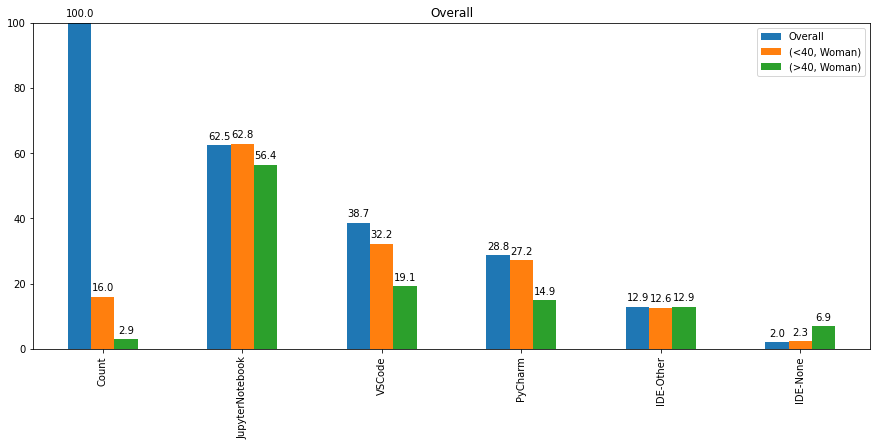

In [1964]:
# Create different df for woman < 40 and woman > 40
df_pl_woman_lt40 = df_pl_summary.loc[('<40', 'Woman'),:].to_frame()#; print("df_pl_woman_lt40\n", df_pl_woman_lt40);print()
df_pl_woman_gt40 = df_pl_summary.loc[('>40', 'Woman'),:].to_frame()#; print("df_pl_woman_gt40\n", df_pl_woman_gt40)

# Concatenate the overall and the woman < 40 and woman > 40 data 
df_temp = pd.concat([df_pl_all, df_pl_woman_lt40, df_pl_woman_gt40], axis=1, join='inner')
print(df_temp)
ax = df_temp.plot.bar( ylim=(0,100),figsize=(15, 6));annotate(ax, "Overall")

- Similar trend in the IDE usage as well.
- None is a little higher than the other categories

  Age-Category  IDECount
0          >40         1
1          >40         2
2          <40         3
3          >40         2
4          >40         3
   Age-Category  IDECount
5           <40         4
6           <40         3
11          <40         2
12          <40         3
21          <40         4


<AxesSubplot:title={'center':'IDECount'}, xlabel='[Age-Category]'>

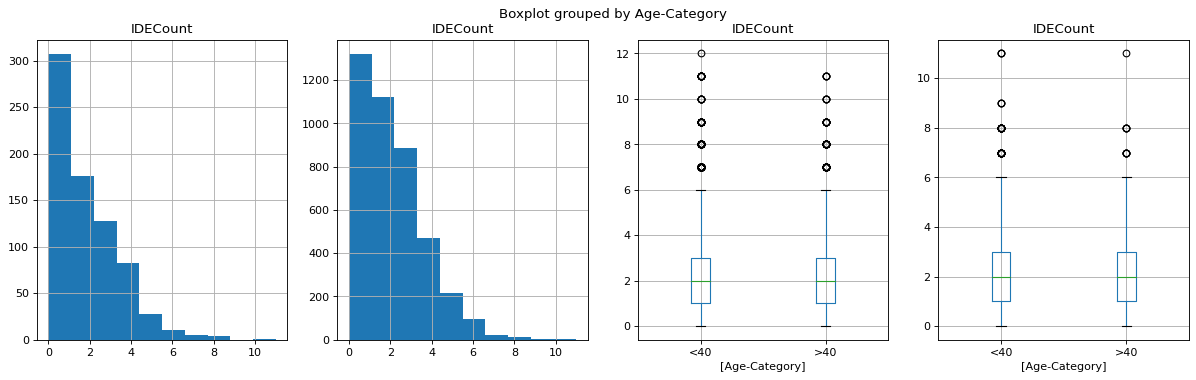

In [1955]:
df_man = df_new[df_new['Gender']=='Man'][['Age-Category', 'IDECount']];print(df_man.head())
df_woman = df_new[df_new['Gender']=='Woman'][['Age-Category', 'IDECount']];print(df_woman.head())
plt.figure(figsize=(18, 5), dpi=80)

ax = plt.subplot(1, 4, 1); df_woman[df_woman['Age-Category']=='>40'].hist(ax=ax)
ax = plt.subplot(1, 4, 2); df_woman[df_woman['Age-Category']=='<40'].hist(ax=ax)
ax = plt.subplot(1, 4, 3); df_man.boxplot(by='Age-Category', ax=ax)
ax = plt.subplot(1, 4, 4); df_woman.boxplot(by='Age-Category',ax=ax)

## Notebooks

In [ ]:
COLS_NB = list(filter(lambda x: True if x[0][:3]=='Q10' else False, df.columns.to_list()))
df[COLS_NB].head()

In [ ]:
df_new['NBCount'] = df[COLS_NB].count(axis=1)
df_new.head()

## Hardware

In [ ]:
COLS_HW = list(filter(lambda x: True if x[0][:3]=='Q12' else False, df.columns.to_list()))
df[COLS_HW].head()

In [ ]:
df_new['HWCount'] = df[COLS_HW].count(axis=1)
df_new.head()